In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/Colab Notebooks/StudentsPerformance.csv'


df = pd.read_csv(path)
df.head()

gender race/ethnicity  ... reading score writing score
0  female        group B  ...            72            74
1  female        group C  ...            90            88
2  female        group B  ...            95            93
3    male        group A  ...            57            44
4    male        group C  ...            78            75

[5 rows x 8 columns]

In [0]:
df.shape #Size of Data Frame

(1000, 8)

In [0]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [0]:
#Analysis the data correlation
corr=df.corr()
corr


math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000

In [0]:
#Checking for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [0]:
#Total Students By Gender
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [0]:
# Set theme
sns.set_style('whitegrid')

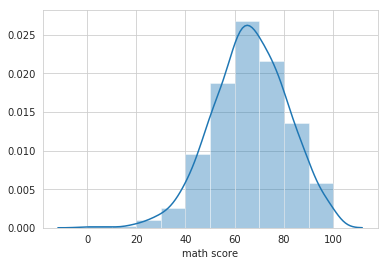

In [0]:
#Univariate Analysis for math score
sns.distplot(df['math score'],  bins=10);

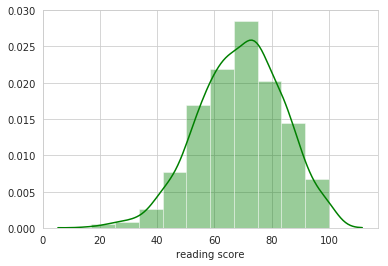

In [0]:
#Univariate Analysis for reading score
sns.distplot(df['reading score'],  bins=10,color='green' );

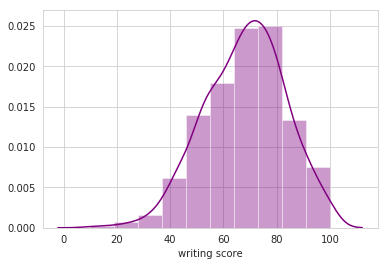

In [0]:
#Univariate Analysis for writing score
sns.distplot(df['writing score'],  bins=10, color='purple' );

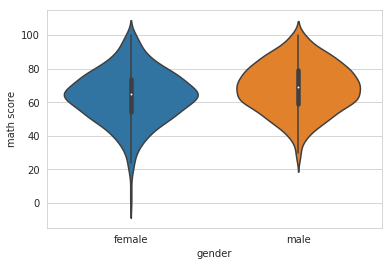

In [0]:

 
# Violin plot
sns.violinplot(x='gender', y='math score', data=df)

In [0]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Text(0.5, 1.0, 'Math Score by Gender')

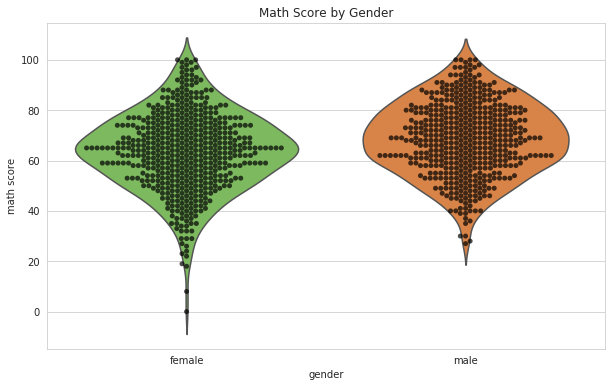

In [0]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='gender',
               y='math score', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='gender',
               y='math score', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Math Score by Gender')

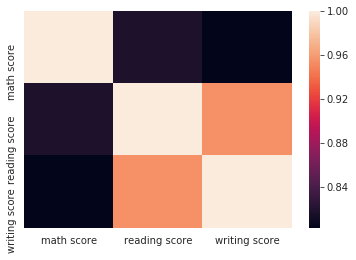

In [0]:
sns.heatmap(corr)

Text(0.5, 1.0, 'Data Analysis by Race/Ethnicity')

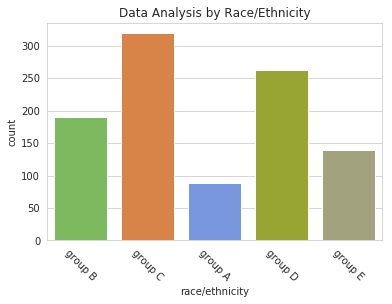

In [0]:
#  Bar Plot
sns.countplot(x='race/ethnicity', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)
plt.title('Data Analysis by Race/Ethnicity')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


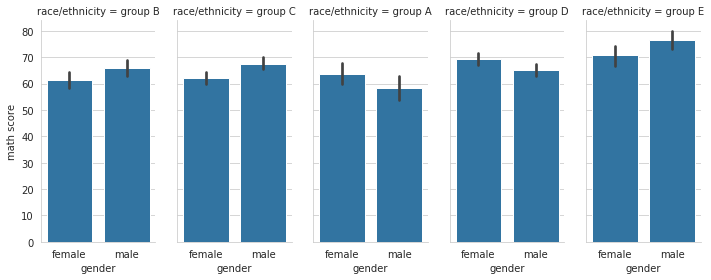

In [0]:
g = sns.FacetGrid(df, col="race/ethnicity", height=4, aspect=.5)
g.map(sns.barplot, "gender", "math score");

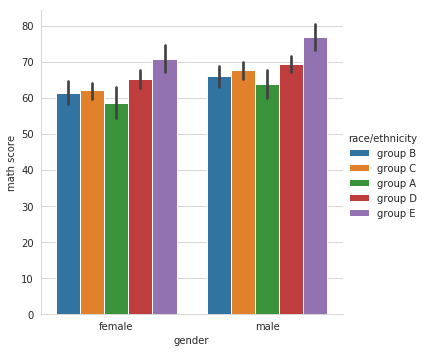

In [0]:
sns.catplot(x="gender", y="math score", hue="race/ethnicity", kind="bar", data=df);

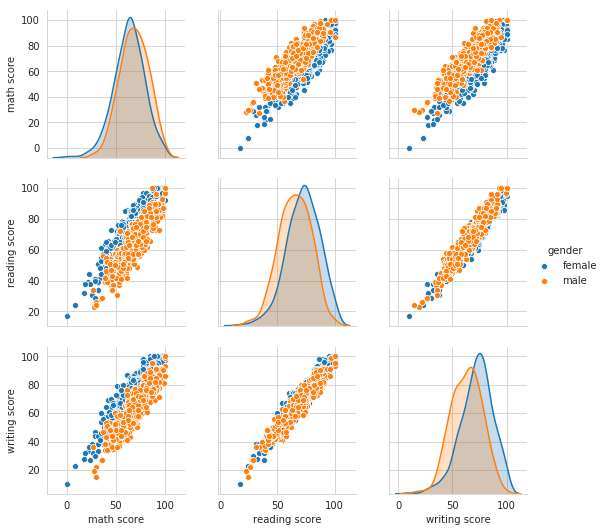

In [0]:
sns.pairplot(df, hue="gender", height=2.5);

In [0]:
df_mean=df.groupby(
   ['gender'],as_index=True
).agg(
    {
         'math score':"mean",   
         'reading score': "mean", 
         'writing score': 'mean'  
    }
)
df_mean

math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203